In [ ]:
# Hipotese 2

# Frequencia de compra de produtos iguais em locais iguais por cliente

In [10]:
import pandas as pd
import os
import glob

#os.chdir("../files/sales")

#### Stores
CSV com todas as lojas

In [15]:
#stores = pd.read_csv("../files/stores/stores_details.csv")
stores = pd.read_csv("../stores/stores_details.csv")

stores = stores[["encrypted_cnpj", "encrypted_cnpj_prefix","encrypted_5_zipcode","cnae_code","cnae_desc","cheque", \
                "debito", "deposito", "dinheiro", "transferencia"]]

##### Sales

CSV comn todas as vendas

Concatena os arquivos de vendas no arquivo vendas.csv

Não precisa executar de novo, só abrir o arquivo vendas.csv

In [16]:
'''
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
vendas = pd.concat([pd.read_csv(f,error_bad_lines=False) for f in all_filenames ])

#export to csv
vendas.to_csv("vendas.csv", index=False, encoding='utf-8-sig')

'''
sales = pd.read_csv("../sales/vendas.csv")

#sales = vendas
sales = sales[["encrypted_cnpj", "encrypted_saleid","dateTime","productTotal","prod_fullname","encrypted_buyer_cpf","encrypted_buyer_cnpj"]]



/Users/pamela/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Trabalhando com as Stores

In [17]:
stores.head()

,encrypted_cnpj,encrypted_cnpj_prefix,encrypted_5_zipcode,cnae_code,cnae_desc,cheque,debito,deposito,dinheiro,transferencia
0,9cddb8b88228cd7c4eead0b03bfd,3137373536623834633666646166383863616135343265...,3932333065383138336362386661663061333733303532...,4731800.0,Comércio varejista de combustíveis para veícul...,0.000000,0.334456,0.0,0.000000,0.0
1,f50e53c6e2570b43d15ec7dfcf92,6466343534303232623763306237306634636139656335...,3238383430613232316466356662333437386364376435...,4731800.0,Comércio varejista de combustíveis para veícul...,0.000000,0.000000,0.0,0.000000,0.0
2,d217627b20f7ab446b8250149f40,3262633161333664643064653561333031653037333135...,3439633639663932636535653966653033363138653032...,5611203.0,"Lanchonetes, casas de chá, de sucos e similares",0.000000,0.018651,0.0,0.970692,0.0
3,c07be06f611961763b7c190534c0,3834663261623030366630393237646232303061663134...,6131363261313237623637303336393731383266376265...,4731800.0,Comércio varejista de combustíveis para veícul...,0.000000,0.027950,0.0,0.000000,0.0
4,5dc07a1ef6f3839d858729107f26,6233646339626133346562303833363737343531396131...,6137623963393930383632323434633533326636353637...,4731800.0,Comércio varejista de combustíveis para veícul...,0.055556,0.750000,0.0,0.000000,0.0


In [18]:
print(stores.describe())

          cnae_code       cheque       debito     deposito     dinheiro  \
count  1.626000e+03  1489.000000  1489.000000  1546.000000  1489.000000   
mean   5.158836e+06     0.017542     0.243683     0.000020     0.170734   
std    8.483577e+05     0.110304     0.318452     0.000440     0.351224   
min    0.000000e+00     0.000000     0.000000     0.000000     0.000000   
25%    4.731800e+06     0.000000     0.000000     0.000000     0.000000   
50%    4.781400e+06     0.000000     0.000000     0.000000     0.000000   
75%    5.611203e+06     0.000000     0.570192     0.000000     0.013772   
max    9.602502e+06     1.000000     1.000000     0.015873     1.000000   

       transferencia  
count   1.546000e+03  
mean    3.833183e-08  
std     1.507177e-06  
min     0.000000e+00  
25%     0.000000e+00  
50%     0.000000e+00  
75%     0.000000e+00  
max     5.926102e-05  


In [19]:
print(stores.isnull().sum())

encrypted_cnpj             0
encrypted_cnpj_prefix      0
encrypted_5_zipcode        4
cnae_code                  2
cnae_desc                  2
cheque                   139
debito                   139
deposito                  82
dinheiro                 139
transferencia             82
dtype: int64


#### Trabalhando com as vendas

In [20]:
sales.reset_index()
sales.head()

,encrypted_cnpj,encrypted_saleid,dateTime,productTotal,prod_fullname,encrypted_buyer_cpf,encrypted_buyer_cnpj
0,744f9707a59fbbffe75dad22aee7,3964636138646135303062353333306434653430346464...,2018-10-21T20:19:05.000Z,36.0195,refeicao,NaN,NaN
1,a74a729c7a3d3c0a6c6f59bb07c5,3932366231346262393563353231623732316462366666...,2018-11-08T19:57:51.000Z,20.0224,gasolina c aditivada,NaN,NaN
2,cd406b5d1bca06e7ea9cdc74e14b,3263653564613138363163653066613462656331303864...,2018-11-24T13:37:09.000Z,18.0298,gasolina comum,NaN,NaN
3,a74a729c7a3d3c0a6c6f59bb07c5,3834363539663165383136366165363735616339353637...,2018-10-17T17:18:06.000Z,20.0312,gasolina c aditivada,NaN,NaN
4,744f9707a59fbbffe75dad22aee7,3561303839376431386534306238346232316165386239...,2018-12-27T12:35:26.000Z,24.013,refeicao,NaN,NaN


In [21]:
print(sales.describe())

                      encrypted_cnpj  \
count                        1499989   
unique                          1554   
top     a74a729c7a3d3c0a6c6f59bb07c5   
freq                           16836   

                                         encrypted_saleid  \
count                                             1499984   
unique                                            1395152   
top     3939353762353239323263393465653132383765613030...   
freq                                                 1177   

                        dateTime  productTotal   prod_fullname  \
count                    1499982    1499982.00         1499982   
unique                    530750     161504.00          178665   
top     2018-12-22T00:00:00.000Z          0.01  gasolina comum   
freq                        8875      58342.00          108289   

                                      encrypted_buyer_cpf  \
count                                              525207   
unique                                  

In [22]:
print(sales.isnull().sum())

encrypted_cnpj               10
encrypted_saleid             15
dateTime                     17
productTotal                 17
prod_fullname                17
encrypted_buyer_cpf      974792
encrypted_buyer_cnpj    1461496
dtype: int64


#### Vendas por CNPJ
Descobrimos o CNPJ que mais vende, em qual região ele fica e a qual CNAE pertence

In [23]:
# soma das vendas por cnpj
# cnpj que mais vendem
sales['productTotal'] = pd.to_numeric(sales['productTotal'], errors='coerce')

vendas_cnpj = pd.DataFrame(sales.groupby("encrypted_cnpj").productTotal.sum())
vendas_cnpj.reset_index()
vendas_cnpj = vendas_cnpj.drop(vendas_cnpj.index[[0,1,2]])
vendas_cnpj=vendas_cnpj.sort_values(by='productTotal', ascending=False)
print(vendas_cnpj.head(5))

                              productTotal
encrypted_cnpj                            
1dcc4997ba5d4f628a2606bb17eb  4.109914e+07
87db6a9e5895a9b0bb0be8b22694  1.300370e+06
36f6ec5f76de55a9137968fd0fde  9.768599e+05
06adb7c8f614e7536089d058198f  9.266674e+05
a74a729c7a3d3c0a6c6f59bb07c5  9.037905e+05


In [24]:
# top vendas por cnae
stores[['cnae_code','encrypted_cnpj', 'cnae_desc']].loc[stores['encrypted_cnpj'].isin(['1dcc4997ba5d4f628a2606bb17eb',\
                                                                                       '87db6a9e5895a9b0bb0be8b22694',\
                                                                                       '36f6ec5f76de55a9137968fd0fde',\
                                                                                       '06adb7c8f614e7536089d058198f',\
                                                                                       'a74a729c7a3d3c0a6c6f59bb07c5'])]


,cnae_code,encrypted_cnpj,cnae_desc
23,4731800.0,36f6ec5f76de55a9137968fd0fde,Comércio varejista de combustíveis para veícul...
86,4731800.0,a74a729c7a3d3c0a6c6f59bb07c5,Comércio varejista de combustíveis para veícul...
114,6463800.0,87db6a9e5895a9b0bb0be8b22694,"Outras sociedades de participação, exceto hold..."
258,4731800.0,06adb7c8f614e7536089d058198f,Comércio varejista de combustíveis para veícul...
517,4729699.0,1dcc4997ba5d4f628a2606bb17eb,Comércio varejista de produtos alimentícios em...



#### Merge dos dataframe de vendas e lojas

In [25]:
sales_store = pd.merge(sales, stores, on='encrypted_cnpj', how='inner')
sales_store = sales_store[['encrypted_cnpj','encrypted_5_zipcode','cnae_code', 'cnae_desc', 'dateTime', \
                           'productTotal', 'prod_fullname']]


In [26]:
sales_store.head(5)

,encrypted_cnpj,encrypted_5_zipcode,cnae_code,cnae_desc,dateTime,productTotal,prod_fullname
0,744f9707a59fbbffe75dad22aee7,3232346266373830376161656536613931303034323632...,5611201.0,Restaurantes e similares,2018-10-21T20:19:05.000Z,36.0195,refeicao
1,744f9707a59fbbffe75dad22aee7,3232346266373830376161656536613931303034323632...,5611201.0,Restaurantes e similares,2018-12-27T12:35:26.000Z,24.0130,refeicao
2,744f9707a59fbbffe75dad22aee7,3232346266373830376161656536613931303034323632...,5611201.0,Restaurantes e similares,2018-10-24T11:34:53.000Z,51.9200,refeicao
3,744f9707a59fbbffe75dad22aee7,3232346266373830376161656536613931303034323632...,5611201.0,Restaurantes e similares,2018-10-02T22:20:51.000Z,32.4500,refeicao
4,744f9707a59fbbffe75dad22aee7,3232346266373830376161656536613931303034323632...,5611201.0,Restaurantes e similares,2018-12-18T17:32:48.000Z,38.2910,refeicao


In [27]:
sales_store["dateTime"] = pd.to_datetime(sales_store["dateTime"])

In [332]:
'''sales_store['data'] = sales_store['dateTime'].str.extract('(....-..-..)', expand=True)
sales_store['hora'] = sales_store['dateTime'].str.extract('(\d\d\:\d\d\:\d\d)', expand=True)
#sales_store['dateTime'] = sales_store['data'] +' '+ sales_store['hora']'''

In [ ]:
'''sales_store['dateTime'].astype('datetime64')
sales_store['data'].astype('datetime64')
sales_store['hora'].astype('datetime64')
#sales_store = sales_store.drop(['data'], axis=1)
#sales_store = sales_store.drop(['hora'], axis=1)
#sales_store = sales_store.drop(['dateTime'], axis=1)
#sales_store['dateTime'].head(5)'''

In [28]:
sales_store.head(5)

,encrypted_cnpj,encrypted_5_zipcode,cnae_code,cnae_desc,dateTime,productTotal,prod_fullname
0,744f9707a59fbbffe75dad22aee7,3232346266373830376161656536613931303034323632...,5611201.0,Restaurantes e similares,2018-10-21 20:19:05,36.0195,refeicao
1,744f9707a59fbbffe75dad22aee7,3232346266373830376161656536613931303034323632...,5611201.0,Restaurantes e similares,2018-12-27 12:35:26,24.0130,refeicao
2,744f9707a59fbbffe75dad22aee7,3232346266373830376161656536613931303034323632...,5611201.0,Restaurantes e similares,2018-10-24 11:34:53,51.9200,refeicao
3,744f9707a59fbbffe75dad22aee7,3232346266373830376161656536613931303034323632...,5611201.0,Restaurantes e similares,2018-10-02 22:20:51,32.4500,refeicao
4,744f9707a59fbbffe75dad22aee7,3232346266373830376161656536613931303034323632...,5611201.0,Restaurantes e similares,2018-12-18 17:32:48,38.2910,refeicao


In [29]:
print(sales_store.isnull().sum())

encrypted_cnpj            0
encrypted_5_zipcode    1330
cnae_code              3176
cnae_desc              3176
dateTime                  0
productTotal              0
prod_fullname             0
dtype: int64


In [30]:
sales_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496642 entries, 0 to 1496641
Data columns (total 7 columns):
encrypted_cnpj         1496642 non-null object
encrypted_5_zipcode    1495312 non-null object
cnae_code              1493466 non-null float64
cnae_desc              1493466 non-null object
dateTime               1496642 non-null datetime64[ns]
productTotal           1496642 non-null float64
prod_fullname          1496642 non-null object
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 91.3+ MB


In [31]:
sales_store['dateTime'].dt.year.head(5)

0    2018
1    2018
2    2018
3    2018
4    2018
Name: dateTime, dtype: int64

#### Produtos vendidos por zipcode

In [32]:
zipcode_prod = sales_store.groupby('encrypted_5_zipcode').cnae_code.nunique()
zipcode_prod=zipcode_prod.sort_values( ascending=False)
zipcode_prod.head(5)

encrypted_5_zipcode
3661373961316338373765313836633138653865316230333366376264313365    9
6136366337303334396538323639333830343332303730393530303630356534    9
6235363135623233353934386564393939383164336661366566643234656538    7
3535646465643131353832613261393632653535653636643231343731633531    6
3733653366393732613964356161633836643736393764336430303637613332    5
Name: cnae_code, dtype: int64

In [33]:
#CEP que mais vende por CNAE
zipcode_prod = sales_store.groupby(['encrypted_5_zipcode', 'cnae_desc']).productTotal.sum()
zipcode_prod=zipcode_prod.sort_values(ascending=False)
zipcode_prod.head(10)

encrypted_5_zipcode                                               cnae_desc                                                                                                                     
6338656164303830383033643564373138346432646634353536383538626632  Comércio varejista de produtos alimentícios em geral ou especializado em produtos alimentícios não especificados anteriormente    4.109914e+07
6532386131313566376538326464313662326666393761643534623965373830  Outras sociedades de participação, exceto holdings                                                                                1.300370e+06
3734313233666565613437366162343231366233323463356265313263663039  Comércio varejista de combustíveis para veículos automotores                                                                      9.768599e+05
3539336562303239613336346466626436383638623961306238616138316662  Comércio varejista de combustíveis para veículos automotores                                                      

In [34]:
#CEP que mais vende por produto
zipcode_prod = sales_store.groupby(['encrypted_5_zipcode']).productTotal.sum()
zipcode_prod=zipcode_prod.sort_values(ascending=False)
zipcode_prod.head(10)

encrypted_5_zipcode
6338656164303830383033643564373138346432646634353536383538626632    4.109914e+07
6532386131313566376538326464313662326666393761643534623965373830    1.300370e+06
3734313233666565613437366162343231366233323463356265313263663039    9.768599e+05
3539336562303239613336346466626436383638623961306238616138316662    9.281872e+05
3730346266653165373162313463336666386466656465336666613163613263    9.037905e+05
3634373563373161666138333063616139393830323735316230313563643261    8.173649e+05
3530396462386337336264366364393134356636363065363931316264343664    7.432313e+05
6235363135623233353934386564393939383164336661366566643234656538    7.142385e+05
3263613164633364346634346232353630633862353634363461313933313439    6.238366e+05
6164373539383236633730343132383831373736643661653938326636613835    5.145400e+05
Name: productTotal, dtype: float64

In [35]:
cep = sales_store.loc[sales_store['encrypted_5_zipcode'].isin(['6338656164303830383033643564373138346432646634353536383538626632'])]


In [36]:
cep['encrypted_cnpj'].unique()

array(['1dcc4997ba5d4f628a2606bb17eb'], dtype=object)

In [37]:
cep['cnae_desc'].unique()

array(['Comércio varejista de produtos alimentícios em geral ou especializado em produtos alimentícios não especificados anteriormente'],
      dtype=object)

In [38]:
cep['productTotal'].sum()

41099141.5924

In [110]:
#Produto
#sales.head(5)
sales_store.groupby(['prod_fullname']).productTotal.sum()

prod_fullname
##far chia 200g sabor da terra (5) sabor da terra                22.900000
#sh.s.line cach.dos sonh.300ml                                   19.000000
%tripack baby sortidos 19 a 22 (981370) sortidos 15 a 18          0.020000
&joy barra protein coco 35g &joy                                  0.060000
( fora de limha) caminhonete scorpion si 2500 special color      32.900000
(1567)cesto multiuso (flexivel)15 lts azul tifany                16.900000
(1567)cesto multiuso (flexivel)15 lts royal                      16.900000
(1568)cesto multiuso (flexivel) 20 lts laran                     19.900000
(1589)cesto quadrado 18 lts royal                                19.900000
(19,90) bife acebolado, chips e arroz                            39.800000
(400)aparador aico cuticulas colorido 7898035001467               3.450000
(5001)cesto flexivel telado 3,4 lts rosa                         17.800000
(5043)caixa 1 rattan 520ml  13x9x6  rosa                          9.800000
(5044)caixa

#### Removendo o CNPJ 1dcc4997ba5d4f628a2606bb17eb
Esse CNPJ representa 50% da base

In [39]:
# Total
sales_store.count()

encrypted_cnpj         1496642
encrypted_5_zipcode    1495312
cnae_code              1493466
cnae_desc              1493466
dateTime               1496642
productTotal           1496642
prod_fullname          1496642
dtype: int64

In [40]:
#Somente cnpj 1dcc4997ba5d4f628a2606bb17eb
sales_store2 = sales_store
sales_store2 = sales_store2[sales_store2.encrypted_cnpj == '1dcc4997ba5d4f628a2606bb17eb']
sales_store2.count()

encrypted_cnpj         1073
encrypted_5_zipcode    1073
cnae_code              1073
cnae_desc              1073
dateTime               1073
productTotal           1073
prod_fullname          1073
dtype: int64

In [41]:
# Outros cnpj
sales_store3 = sales_store
sales_store3 = sales_store3[sales_store3.encrypted_cnpj != '1dcc4997ba5d4f628a2606bb17eb']
sales_store3.count()

encrypted_cnpj         1495569
encrypted_5_zipcode    1494239
cnae_code              1492393
cnae_desc              1492393
dateTime               1495569
productTotal           1495569
prod_fullname          1495569
dtype: int64

In [42]:
sales_store3.head(5)

,encrypted_cnpj,encrypted_5_zipcode,cnae_code,cnae_desc,dateTime,productTotal,prod_fullname
0,744f9707a59fbbffe75dad22aee7,3232346266373830376161656536613931303034323632...,5611201.0,Restaurantes e similares,2018-10-21 20:19:05,36.0195,refeicao
1,744f9707a59fbbffe75dad22aee7,3232346266373830376161656536613931303034323632...,5611201.0,Restaurantes e similares,2018-12-27 12:35:26,24.0130,refeicao
2,744f9707a59fbbffe75dad22aee7,3232346266373830376161656536613931303034323632...,5611201.0,Restaurantes e similares,2018-10-24 11:34:53,51.9200,refeicao
3,744f9707a59fbbffe75dad22aee7,3232346266373830376161656536613931303034323632...,5611201.0,Restaurantes e similares,2018-10-02 22:20:51,32.4500,refeicao
4,744f9707a59fbbffe75dad22aee7,3232346266373830376161656536613931303034323632...,5611201.0,Restaurantes e similares,2018-12-18 17:32:48,38.2910,refeicao


In [43]:
# total de vendas por dia/mes, cep e cnae
# sem o cnpj Big
total = sales_store3[['encrypted_5_zipcode', 'cnae_code','dateTime','productTotal']]


In [44]:
total["dateTime"] = pd.to_datetime(total["dateTime"])
total['year'] = total['dateTime'].dt.year
total['month'] = total['dateTime'].dt.month
total['day'] = total['dateTime'].dt.day

/Users/pamela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/pamela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/pamela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [45]:
x = total.groupby(['dateTime','year','month', 'day','cnae_code','encrypted_5_zipcode'], as_index=False).productTotal.mean()


In [46]:
x.sort_values(by=['productTotal'], ascending=False).head(10)

,dateTime,year,month,day,cnae_code,encrypted_5_zipcode,productTotal
896801,2018-12-28 18:19:00,2018,12,28,6463800.0,6532386131313566376538326464313662326666393761...,899273.914100
669117,2018-12-08 08:04:16,2018,12,8,4731800.0,6565386262366530383631643635623332313635363034...,28400.000000
718978,2018-12-13 09:34:03,2018,12,13,4731800.0,6565386262366530383631643635623332313635363034...,28400.000000
57737,2018-10-06 08:00:52,2018,10,6,4731800.0,6565386262366530383631643635623332313635363034...,23520.000000
570444,2018-11-27 18:40:00,2018,11,27,5611203.0,6564373937636565623438336132633139353761323463...,18101.600000
26288,2018-10-03 13:07:38,2018,10,3,4731800.0,3539336562303239613336346466626436383638623961...,17556.000000
766324,2018-12-17 16:37:34,2018,12,17,4731800.0,3436376566353461313638643564383339323966373536...,17000.000000
309479,2018-10-30 00:00:00,2018,10,30,5611201.0,6439613063346465346138373833306639333136643031...,14269.888231
629459,2018-12-04 10:30:00,2018,12,4,4781400.0,3636333066306662323164353831646135616337613535...,12759.780000
88624,2018-10-09 09:16:00,2018,10,9,4755501.0,3535346334343234356337333763343731376565663934...,12236.480000


In [47]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 925868 entries, 0 to 925867
Data columns (total 7 columns):
dateTime               925868 non-null datetime64[ns]
year                   925868 non-null int64
month                  925868 non-null int64
day                    925868 non-null int64
cnae_code              925868 non-null float64
encrypted_5_zipcode    925868 non-null object
productTotal           925868 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 56.5+ MB


Text(-8.825,0.5,'Count')

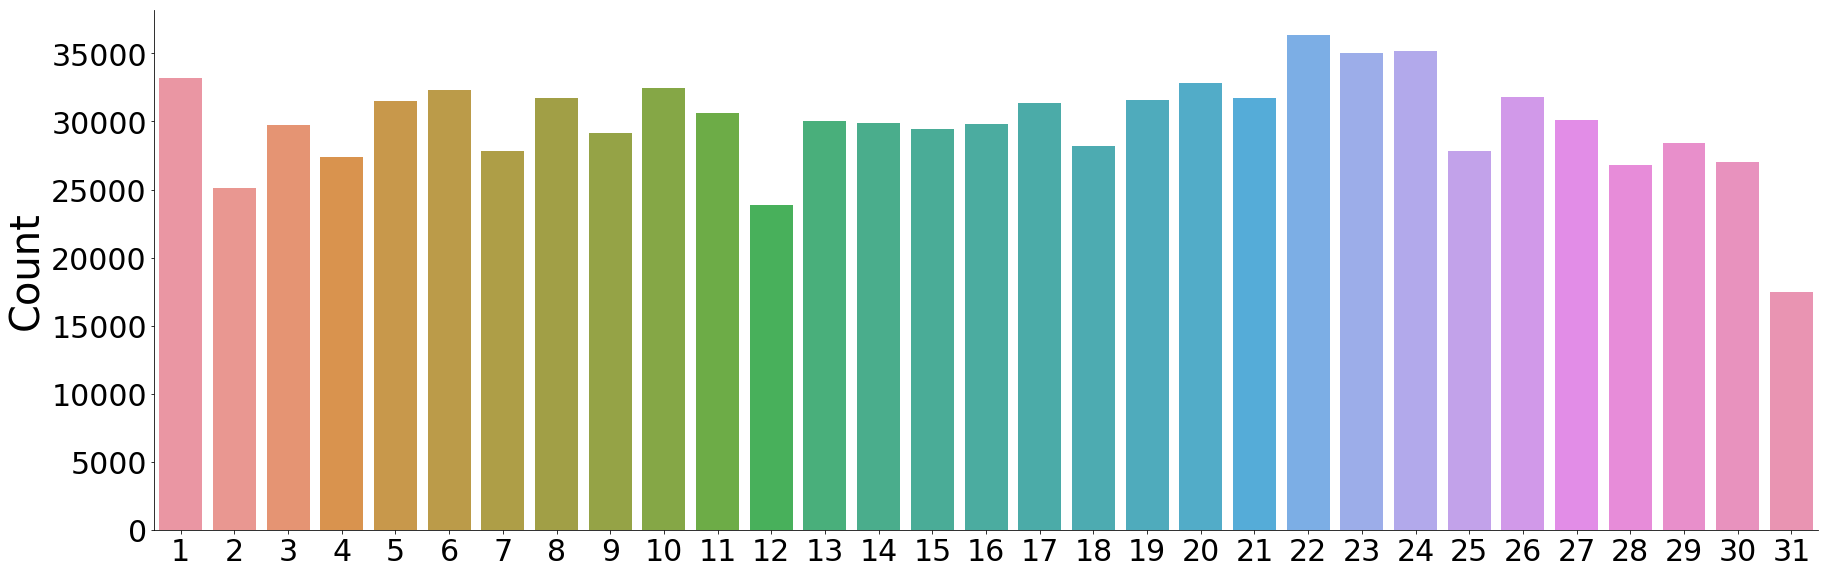

In [53]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Sales by day of the week
sns.catplot(x='day',
           kind='count',
            height=8, 
            aspect=3,
           data=x)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)

Text(-15.075,0.5,'Count')

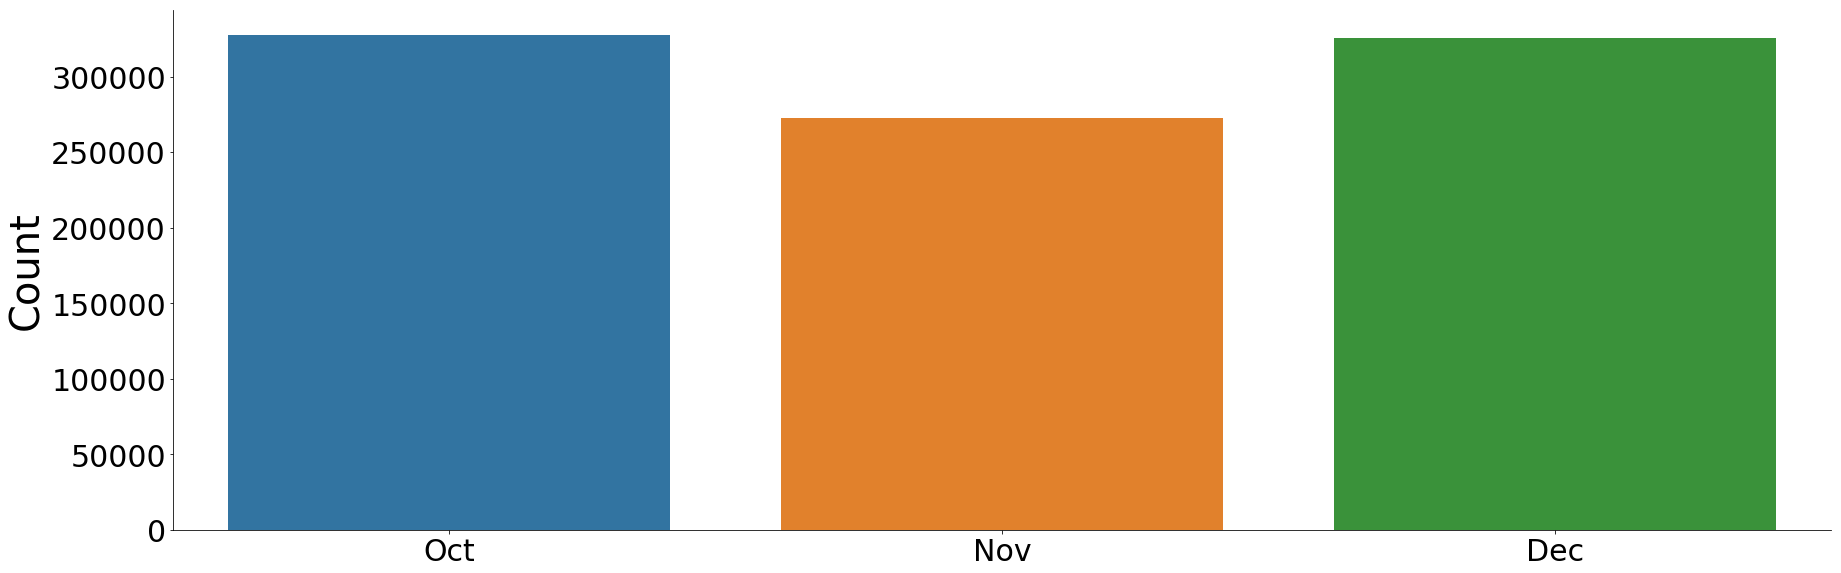

In [58]:
# Sales by month 
import numpy as np
months = ['Oct','Nov','Dec']
sns.catplot(x='month',
           kind='count',
            height=8, 
            aspect=3,
           data=x)
plt.xticks(np.arange(3), months, size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)

In [67]:
x.head(5)

,dateTime,year,month,day,cnae_code,encrypted_5_zipcode,productTotal
0,2018-10-01,2018,10,1,0.0,3535613366376232343430356562326230663963393234...,8.342857
1,2018-10-01,2018,10,1,0.0,6330383364323962653833643562323038363834343739...,4.857143
2,2018-10-01,2018,10,1,1053800.0,3132323463643963666632353930626461333261336230...,4.750000
3,2018-10-01,2018,10,1,1053800.0,3862336364303630373962626135393934316164613466...,5.175000
4,2018-10-01,2018,10,1,1091102.0,6237326130373938346132616630336631326136383262...,10.476338


In [107]:
x.corr()

,year,month,day,cnae_code,productTotal
year,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,0.026003,-0.011206,0.000826
day,NaN,0.026003,1.000000,-0.004533,0.001011
cnae_code,NaN,-0.011206,-0.004533,1.000000,-0.002869
productTotal,NaN,0.000826,0.001011,-0.002869,1.000000


#### Predição

In [105]:
#arrumando os dados

dados = x[['month', 'cnae_code']]
resultados = x[['productTotal']]
#resultados = np.array(resultados.productTotal).reshape(-1,1)
resultados=resultados.astype('int')

In [106]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

clf = MultinomialNB()
treino_dados, teste_dados, treino_resultados, teste_resultados = train_test_split(dados, resultados) # 75% para treino e 25% para teste

clf.fit (treino_dados, treino_resultados)
pred = clf.predict (teste_dados)

print(pred) 
print(teste_resultados) 


/Users/pamela/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5 5 5 ... 5 5 5]
        productTotal
111899            22
24218              4
907803            25
501103            32
640174             2
224270             0
872652            40
922238            29
85231              3
464942             3
471107            10
148154            70
181300            71
801851             4
63253             60
733668            12
116245            47
367890            59
182512           100
419387            79
691761             5
332688             4
748356            13
338569            75
375130           249
543832            39
740381             9
55126            109
190646           189
79043             49
...              ...
705748           124
801862             4
642304            13
613461            40
733950           138
129284            20
638527            22
313083             3
637782            30
911097            50
139351            12
782618            92
697998            10
112002            12
604324          

#### Perfil dos compradores
a loja pode ser considerada “premium”, “média” ou “popular” de acordo com o perfil de produtos que são vendidos. Lojas “premium” contam tickets médios mais altos nas categorias de produtos que atendem, marcas mais sofisticadas e compras feitas com cartão de crédito. Também tendem a ficar em áreas mais nobres de grandes cidades. Em contrapartida, lojas “populares” são mais orientadas a preços competitivos nas categorias de produtos e tendem a estar localizadas em regiões menos abastadas do espaço urbano

In [85]:
stores.cnae_desc.unique()

array(['Comércio varejista de combustíveis para veículos automotores',
       'Lanchonetes, casas de chá, de sucos e similares',
       'Comércio varejista de suvenires, bijuterias e artesanatos',
       'Restaurantes e similares',
       'Comércio varejista de mercadorias em geral, com predominância de produtos alimentícios - supermercados',
       'Comércio varejista de produtos alimentícios em geral ou especializado em produtos alimentícios não especificados anteriormente',
       'Comércio varejista de material elétrico',
       'Comércio varejista de mercadorias em geral, com predominância de produtos alimentícios - minimercados, mercearias e armazéns',
       'Holdings de instituições não-financeiras',
       'Comércio varejista de artigos do vestuário e acessórios',
       'Comércio atacadista de livros, jornais e outras publicações',
       'Outras sociedades de participação, exceto holdings',
       'Comércio varejista de artigos de papelaria',
       'Comércio atacadista de m